In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Leads.csv")

# Preview
print("Original shape:", df.shape)
df.head()

Original shape: (9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Drop columns with >40% null values
null_ratio = df.isnull().mean()
high_null_cols = null_ratio[null_ratio > 0.4].index.tolist()

# Drop also ID-like or non-informative columns
irrelevant_cols = [
    'Prospect ID', 'Lead Number',
    'What matters most to you in choosing a course',
    'Tags', 'Lead Profile',
    'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
    'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
]

df.drop(columns=list(set(high_null_cols + irrelevant_cols)), inplace=True)


In [6]:
# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Fill object (categorical) columns with "Unknown"
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

# Fill numeric columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [7]:
# Drop columns that don't vary
low_variance_cols = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=low_variance_cols, inplace=True)

In [8]:
print("Cleaned shape:", df.shape)
print("Remaining columns:\n", df.columns.tolist())
df.head()

Cleaned shape: (9240, 22)
Remaining columns:
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,...,Unemployed,No,No,No,No,No,No,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Unemployed,No,No,No,No,No,No,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Student,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified


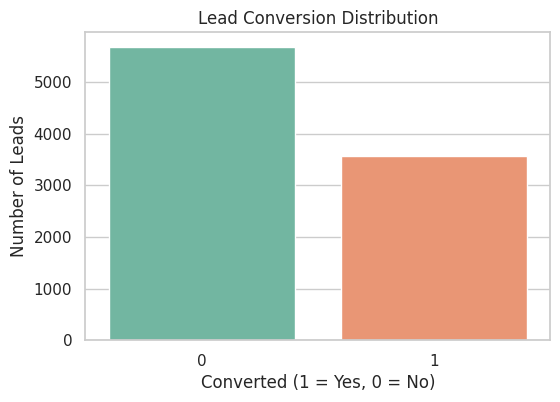

Overall Conversion Rate: 38.54%


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot conversion count
plt.figure(figsize=(6, 4))
sns.countplot(x='Converted', data=df, hue='Converted', palette='Set2', legend=False)
plt.title("Lead Conversion Distribution")
plt.xlabel("Converted (1 = Yes, 0 = No)")
plt.ylabel("Number of Leads")
plt.show()

# Print percentage
conv_rate = df['Converted'].mean() * 100
print(f"Overall Conversion Rate: {conv_rate:.2f}%")

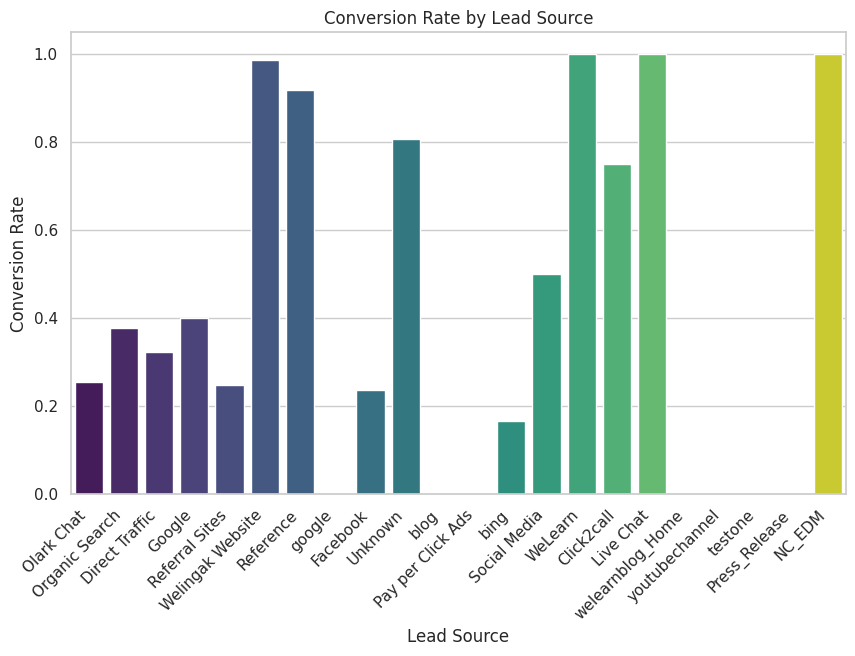

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Lead Source',
    y='Converted',
    data=df,
    errorbar=None,        # replaces ci=None
    palette='viridis',
    hue='Lead Source',    # set hue to avoid palette warning
    legend=False
)
plt.xticks(rotation=45, ha='right')
plt.title("Conversion Rate by Lead Source")
plt.ylabel("Conversion Rate")
plt.xlabel("Lead Source")
plt.show()


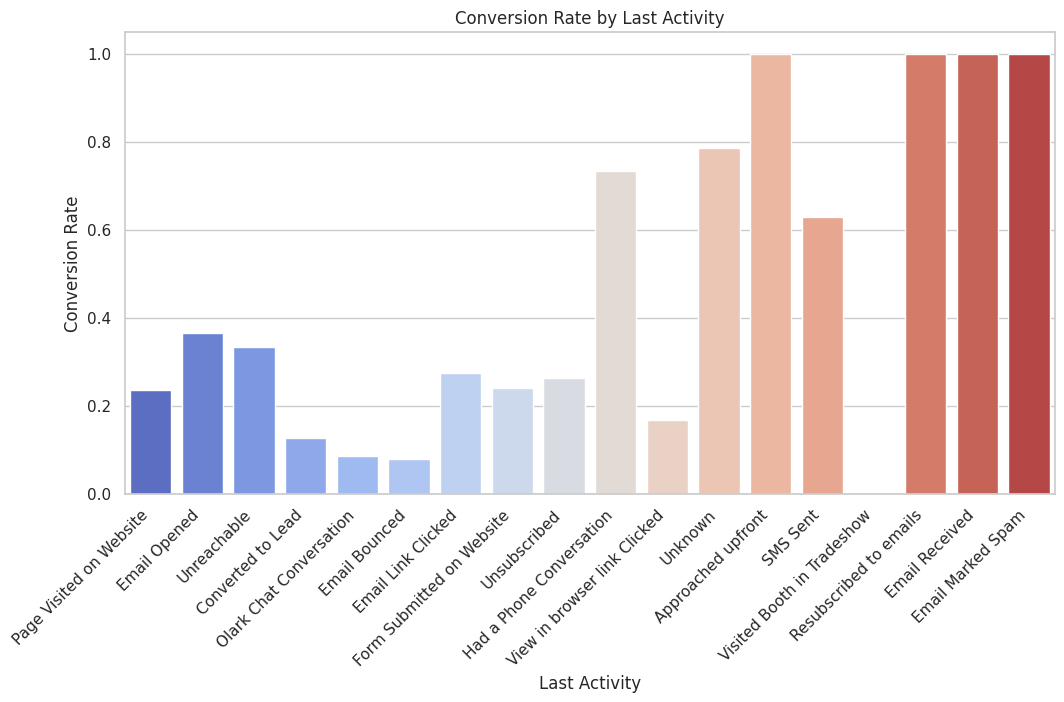

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Last Activity',
    y='Converted',
    data=df,
    errorbar=None,
    palette="coolwarm",
    hue='Last Activity',
    legend=False
)
plt.xticks(rotation=45, ha='right')
plt.title("Conversion Rate by Last Activity")
plt.ylabel("Conversion Rate")
plt.xlabel("Last Activity")
plt.show()

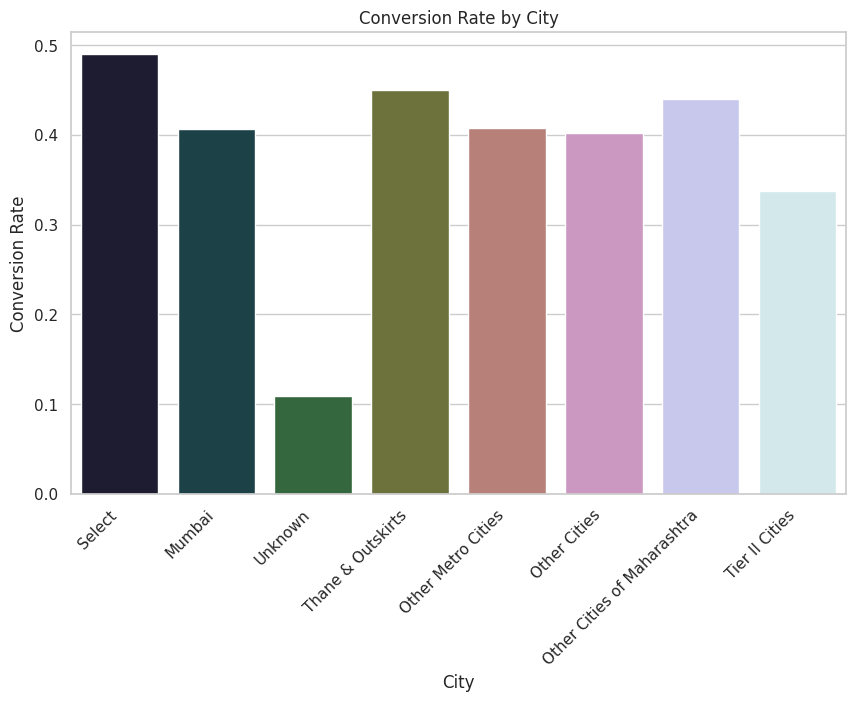

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='City',
    y='Converted',
    data=df,
    errorbar=None,
    palette="cubehelix",
    hue='City',
    legend=False
)
plt.xticks(rotation=45, ha='right')
plt.title("Conversion Rate by City")
plt.ylabel("Conversion Rate")
plt.xlabel("City")
plt.show()

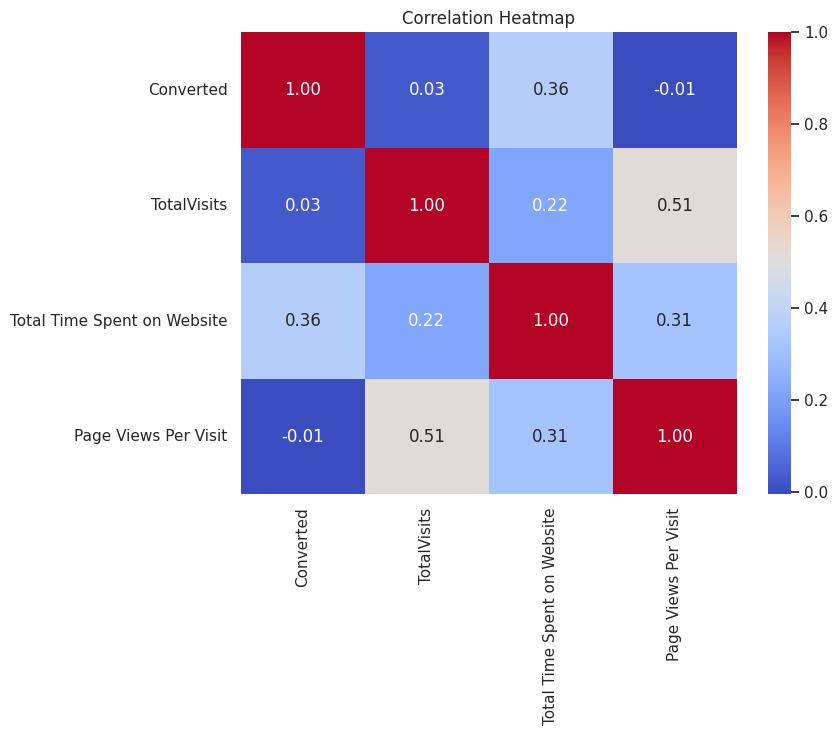

In [13]:
plt.figure(figsize=(8, 6))
numeric_features = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid touching the original cleaned df
df_model = df.copy()

# Encode all object (categorical) columns using LabelEncoder
label_encoders = {}
cat_cols = df_model.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # save encoder for later use (e.g., in prediction)

In [15]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_model.drop('Converted', axis=1)
y = df_model['Converted']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train again with scaled data
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1136
           1       0.68      0.74      0.71       712

    accuracy                           0.76      1848
   macro avg       0.75      0.76      0.75      1848
weighted avg       0.77      0.76      0.77      1848



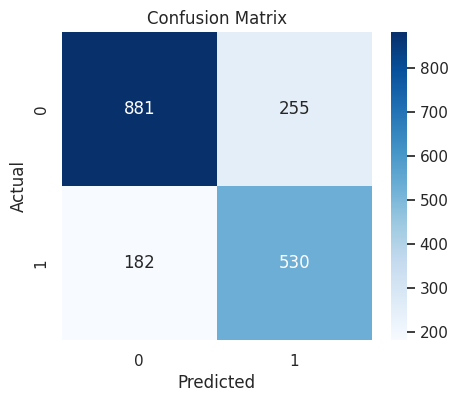

ROC-AUC Score: 0.8213


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = lr.predict(X_test)

# Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUC Score
y_prob = lr.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_score:.4f}")

In [19]:
print(df['Converted'].value_counts())


Converted
0    5679
1    3561
Name: count, dtype: int64


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression # Added import

# Balance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After :", y_resampled.value_counts())

# Train again
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test_scaled)  # still use scaled X_test

# Evaluate again
from sklearn.metrics import classification_report # Added import
print("Classification Report:\n", classification_report(y_test, y_pred))

Before: Converted
0    4543
1    2849
Name: count, dtype: int64
After : Converted
1    4543
0    4543
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.91      0.77      1136
           1       0.66      0.26      0.38       712

    accuracy                           0.66      1848
   macro avg       0.66      0.59      0.57      1848
weighted avg       0.66      0.66      0.62      1848



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1136
           1       0.74      0.78      0.76       712

    accuracy                           0.81      1848
   macro avg       0.80      0.80      0.80      1848
weighted avg       0.81      0.81      0.81      1848



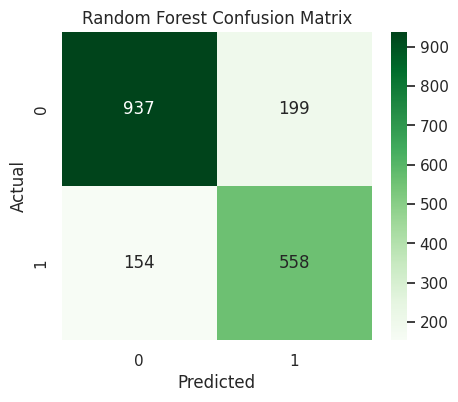

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:45:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1136
           1       0.75      0.78      0.76       712

    accuracy                           0.81      1848
   macro avg       0.80      0.81      0.80      1848
weighted avg       0.81      0.81      0.81      1848



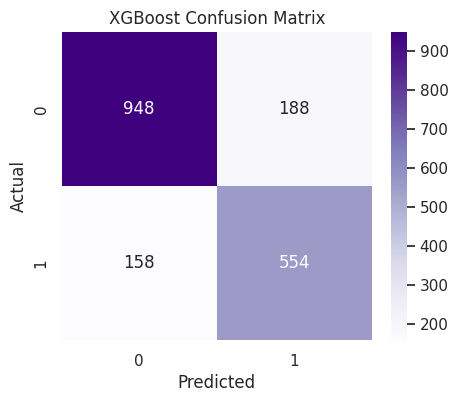

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


100%|===================| 3690/3696 [04:28<00:00]       

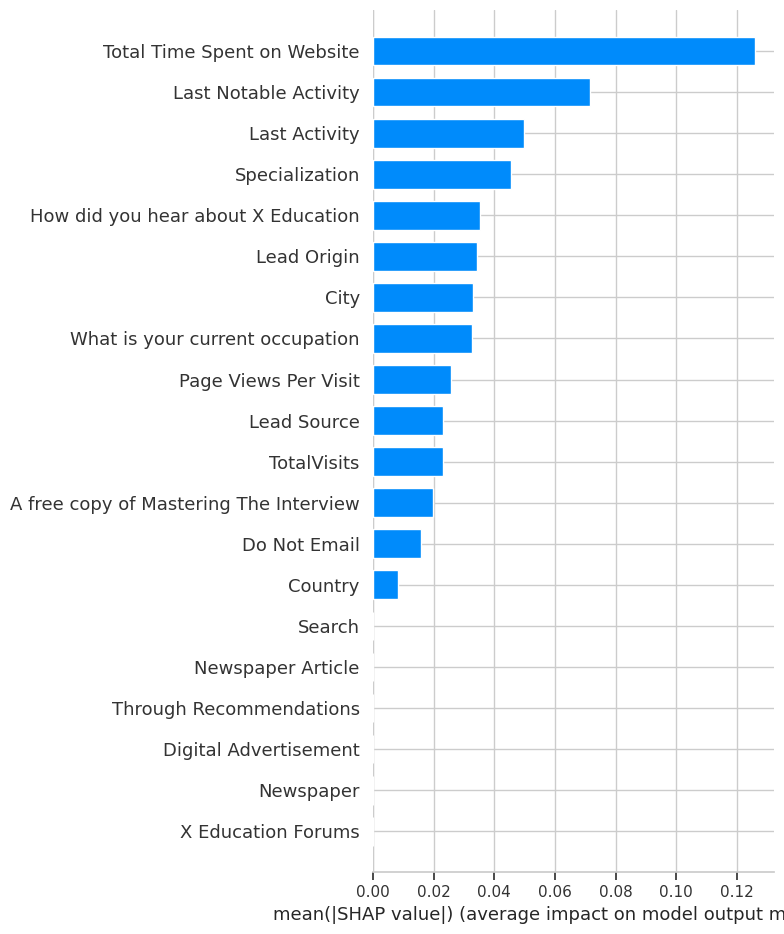

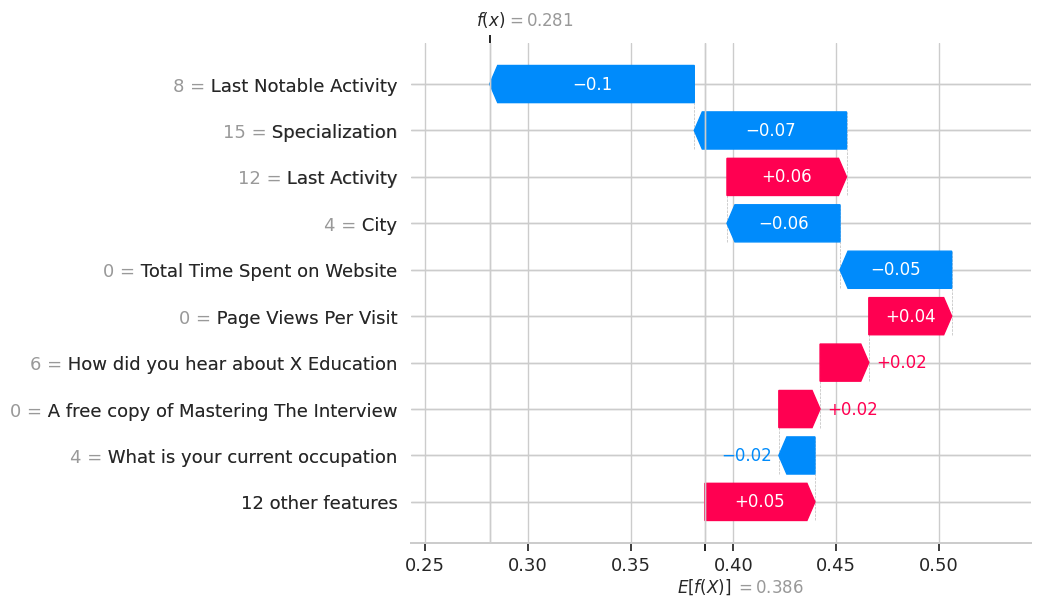

In [31]:
import shap

# Create explainer (TreeExplainer works best for RF/XGB)
explainer = shap.Explainer(rf, X_test)
shap_values = explainer(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values[..., 1], X_test, plot_type="bar")  # use only class 1

# Waterfall plot for one test example
shap.plots.waterfall(shap_values[1, : , 1])  # 1st row, all features, class 1

In [24]:
def predict_lead_conversion(user_input_dict):
    import pandas as pd
    import numpy as np

    # Convert dict to DataFrame
    input_df = pd.DataFrame([user_input_dict])

    # Encode categorical columns
    for col in input_df.columns:
        if col in label_encoders:
            le = label_encoders[col]
            input_df[col] = le.transform([str(val) if val in le.classes_ else "Unknown"
                                          for val in input_df[col]])

    # Ensure column order matches training
    input_df = input_df[X.columns]

    # Predict using trained model
    prediction = rf.predict(input_df)[0]
    probability = rf.predict_proba(input_df)[0][1]

    return ("Converted" if prediction == 1 else "Not Converted", round(probability * 100, 2))


In [32]:
import pickle

# Save trained model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save column order
with open('x_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

In [33]:
# At the end of model training notebook
import joblib
joblib.dump(X_train, "X_train.pkl")

['X_train.pkl']

In [34]:
import pandas as pd
import random
import pickle
import joblib # Import joblib

# Load model and encoders
rf = pickle.load(open('rf_model.pkl', 'rb'))
encoder_dict = pickle.load(open('label_encoders.pkl', 'rb'))

# Load training data for reference using joblib
X_train_loaded = joblib.load("X_train.pkl") # Load using joblib

# Generate 1 random lead
def generate_random_lead(df_original, encoder_dict):
    data = {}
    for col in df_original.columns:
        if col != 'Converted': # Exclude the target variable
            if df_original[col].dtype == 'object':
                # Use original df for sampling categorical values
                data[col] = random.choice(df_original[col].unique())
            else:
                # Use original df min/max for numerical values
                data[col] = random.uniform(df_original[col].min(), df_original[col].max())
    return pd.DataFrame([data])

# Predict
# Use the original df to generate a random lead with meaningful values
input_df = generate_random_lead(df, encoder_dict)

# Encode categorical columns
for col in encoder_dict:
    # Ensure the value to be transformed is in the classes of the encoder
    if col in input_df.columns and input_df[col].iloc[0] in encoder_dict[col].classes_:
         input_df[col] = encoder_dict[col].transform(input_df[col])
    elif col in input_df.columns:
         # Handle unseen values if necessary, here we'll use a placeholder or raise an error
         # For simplicity, let's assume "Unknown" exists or handle it
         if "Unknown" in encoder_dict[col].classes_:
            input_df[col] = encoder_dict[col].transform(["Unknown"])[0]
         else:
            # Or handle this case differently, maybe drop the column or raise an error
            print(f"Warning: Unseen value for column {col}. Cannot transform.")
            # Optionally, drop the column or impute
            # input_df = input_df.drop(columns=[col])
            pass # Continue for now

# Ensure column order matches the training data (X) - assuming X is still available in kernel
if 'X' in globals():
  input_df = input_df[X.columns]
else:
  print("Warning: X (training columns) not found. Column order might be incorrect.")


pred_prob = rf.predict_proba(input_df)[0][1]
print(f"Prediction: {'Converted' if pred_prob > 0.5 else 'Not Converted'} ({pred_prob * 100:.2f}%)")
print("Input:", input_df)

Prediction: Not Converted (42.00%)
Input:    Lead Origin  Lead Source  Do Not Email  Do Not Call  TotalVisits  \
0            3            4             1            0     6.290467   

   Total Time Spent on Website  Page Views Per Visit  Last Activity  Country  \
0                  2214.420246             32.065368              0        2   

   Specialization  ...  What is your current occupation  Search  \
0              12  ...                                0       1   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  1                   1          0                      0   

   Through Recommendations  City  A free copy of Mastering The Interview  \
0                        1     5                                       0   

   Last Notable Activity  
0                      1  

[1 rows x 21 columns]
